[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.jupyter.org/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/box_sensitivities.ipynb)    
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/open-atmos/PySDM.git/main?urlpath=examples/PySDM_examples/deJong_Mackay_et_al_2023/box_sensitivities.ipynb)    
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/open-atmos/PySDM/blob/main/examples/PySDM_examples/deJong_Mackay_et_al_2023/box_sensitivities.ipynb)

In [1]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Azimi import Settings0D
from PySDM_examples.deJong_Azimi import run_box
from open_atmos_jupyter_utils import show_plot
import numpy as np
from PySDM.physics import si
from scipy.special import gamma

In [2]:
def dvdlnr_gamma(m, N, theta, k):
    return N * m**(k-1) * np.exp(-m / theta) / theta**k / gamma(k)

# Golovin Kernel

In [3]:
# MOM data
t = np.array([0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0])
aM0 = np.array([100.0, 60.41666666666108, 36.50173611110569, 22.05313223379227, 13.32376739124922, 8.049776132212969, 4.863406413211965, 2.938308041315548, 1.775227774961471, 1.072533447372555, 0.6479889577875856, 0.39149332866333514, 0.23652721940076313])
aM1 = np.array([10.0, 10.0, 10.0, 10.000000000000002, 10.000000000000002, 9.999999999999991, 10.000000000000007, 10.000000000000002, 9.999999999999956, 9.999999999999966, 9.999999999999872, 10.000000000000062, 10.000000000000108])
aM2 = np.array([2.0, 5.333333333333704, 14.222222222223586, 37.92592592592996, 101.13580246914695, 269.69547325105935, 719.1879286694924, 1917.8344764519795, 5114.225270538599, 13637.934054769523, 36367.82414605215, 96980.86438947004, 258615.63837192673])
aMoments = np.array([aM0, aM1, aM2])
aDists = np.array([[100.0, 0.1, 1.0],[4.863406413211965, 69.86262088575636, 0.029431646782264554],[0.2365272194007631, 25819.285405029976, 0.0016374749145528168]])

bM0 = np.array([
    [100.0, 56.396636657301194, 31.895287187247146, 18.294957761981376, 10.660817516471703, 6.290591039424345, 3.7443020392268367, 2.2413636351719695, 1.3464994349989194, 0.8107024270698977, 0.48877185047542177, 0.2949239965078066, 0.17804598720980272],
    [1.0e-6, 4.0200190988219875, 4.606433069139865, 3.758158525366545, 2.6629362775448184, 1.7591745237414111, 1.1190966122081454, 0.696938913153295, 0.42872454995378795, 0.2618284523381802, 0.15921539069060084, 0.09656819650467219, 0.058480487065190184]
    ])
bM1 = np.array([
    [10.0, 6.354890848885312, 3.815306159255158, 2.2491773102504062, 1.3276630984776567, 0.7884211778943261, 0.4708461282568907, 0.28236149853196507, 0.16980173598586254, 0.10229476631106786, 0.06169480173887945, 0.03723418494509775, 0.022481089449094008],
    [1.0e-5, 3.6451213684882426, 6.184706455055038, 7.75083495382188, 8.672348657723711, 9.211590117984043, 9.529164800771182, 9.717649154060018, 9.83020871507534, 9.89771554128402, 9.938315405635903, 9.962775953501628, 9.977529002206483],
    ])
bM2 = np.array([
    [2.0, 1.3279917682405473, 0.815368316209652, 0.484406234346711, 0.2866707891616959, 0.1703612676331259, 0.10175389387661611, 0.06101894293570185, 0.03669236327334466, 0.022103697711640027, 0.013330436832490668, 0.00804502307966626, 0.0048573143944901],
    [0.0002, 4.005880364582517, 13.40830335654937, 37.445419449158464, 100.85962493652575, 269.5533461366049, 719.1621396161328, 1917.977828184842, 5114.73836146586, 13639.390826596753, 36371.78858209591, 96991.55465118046, 258644.4048115109]
    ])
bMoments = np.array([bM0, bM1, bM2])
bDists1 = np.array([[100.0, 3.7443020392268367, 0.17804598720980272], [0.1, 0.09035855289429393, 0.08979659938892945], [1.0, 1.3916783213625432, 1.4061293503242225]]).T
bDists2 = np.array([[1.0e-6, 1.1190998946220907, 0.05848079412663001], [1.0, 66.94723995610593, 25749.457224681548], [3.0, 0.12718999335996053, 0.00662584618581055]]).T

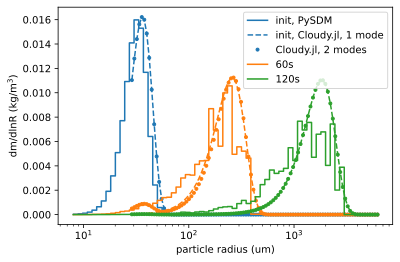

HTML(value="<a href='./box1.pdf' target='_blank'>./box1.pdf</a><br>")

In [4]:
settings = Settings0D()
settings._steps = [0, 60, 120]  # pylint: disable=protected-access

cmap = matplotlib.cm.get_cmap('viridis')

res = run_box(settings, settings._steps)

fig, ax = pyplot.subplots(ncols=1,sharey=True,figsize=(6,4),dpi=200)

m_plt = np.logspace(-1.0, 6.0, 100) #µg
r_plt = (m_plt * 1e6 * 3 / 4 / np.pi) ** (1/3) #µm

for (j, step) in enumerate(settings._steps):  # pylint: disable=protected-access
    if j == 0:
        lbl = 'init, PySDM'
    else:
        lbl = str(step) + 's'
    line = ax.step(res.x, res.y[j]*settings.rho, label=lbl)
    
    if j == 0:
        lbl =  'init, Cloudy.jl, 1 mode'
    else:
        lbl = '_'
    a_dmdlnr = dvdlnr_gamma(m_plt, aDists[j][0], aDists[j][1], aDists[j][2]) * 3 * m_plt**2 #µg / cm^3
    a_dmdlnr *= 1e-3 # kg / m^3
    ax.plot(r_plt, a_dmdlnr, '--', label=lbl, color=line[-1].get_color())

    if j == 0:
        lbl =  'Cloudy.jl, 2 modes'
    else:
        lbl = '_'
    b_dmdlnr = dvdlnr_gamma(m_plt, bDists1[j][0], bDists1[j][1], bDists1[j][2]) * 3 * m_plt**2 #µg / cm^3
    b_dmdlnr += dvdlnr_gamma(m_plt, bDists2[j][0], bDists2[j][1], bDists2[j][2]) * 3 * m_plt**2 #µg / cm^3
    b_dmdlnr *= 1e-3 # kg / m^3
    ax.plot(r_plt, b_dmdlnr, '.', label=lbl, color=line[-1].get_color())

ax.set_xscale("log")
ax.set_xlabel("particle radius (um)")
ax.set_ylabel("dm/dlnR (kg/m$^3$)")
ax.legend()
show_plot('box1.pdf')

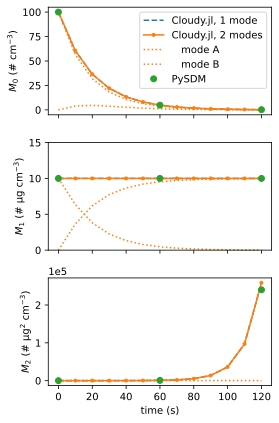

HTML(value="<a href='./box1_moments.pdf' target='_blank'>./box1_moments.pdf</a><br>")

In [5]:
fig, ax = pyplot.subplots(nrows=3,sharex=True,figsize=(4,6),dpi=200)
for i in range(3):
    line = ax[i].plot(t, aMoments[i], '--', label='Cloudy.jl, 1 mode')
    line = ax[i].plot(t, bMoments[i,0] + bMoments[i,1], '.-', label='Cloudy.jl, 2 modes')
    ax[i].plot(t, bMoments[i,0], ':', linewidth=1.5, label='   mode A', color=line[-1].get_color())
    ax[i].plot(t, bMoments[i,1], ':', linewidth=1.5, label='   mode B', color=line[-1].get_color())
    ax[i].plot(settings._steps, res.moments[:,i] * settings.dv * si.cm**3 * (si.m**3 / si.cm**3 * 1e6)**i,marker='o',linestyle='None',label='PySDM')

ax[0].legend()
ax[0].set_ylabel('$M_0$ (# cm$^{-3}$)')
ax[1].set_ylabel('$M_1$ (# µg cm$^{-3}$)')
ax[1].set_ylim([0.0, 15.0])
ax[2].set_ylabel('$M_2$ (# µg$^2$ cm$^{-3}$)')
ax[2].set_xlabel('time (s)')
ax[2].ticklabel_format(axis='y', style='sci', scilimits=(0,2))

pyplot.tight_layout()
show_plot('box1_moments.pdf')

## Geometric

In [6]:
# MOM data
t = np.array([0.0, 20.0, 40.0, 60.0, 80.0, 100.0, 120.0, 140.0, 160.0, 180.0, 200.0, 220.0, 240.0])
aM0 = np.array([100.0, 83.09411530706723, 69.0668818692553, 57.42833556073367, 47.771892319320436, 39.760132461015466, 33.11299776856557, 27.59799298461195, 23.022057367028655, 19.22483391072762, 16.073111976893788, 13.456251155748634, 11.282412772916492])
aM1 = np.array([10.0, 9.999999999999998, 9.999999999999995, 9.999999999999998, 10.000000000000002, 10.000000000000004, 9.999999999999996, 9.999999999999996, 9.999999999999998, 9.999999999999998, 9.999999999999998, 9.999999999999988, 9.99999999999999])
aM2 = np.array([2.0, 2.8852151953194194, 4.151238620053756, 5.950500062169887, 8.485178624869318, 12.0129886133155, 16.84418831764611, 23.32258967740333, 31.78481092193408, 42.500028311068455, 55.60685101272762, 71.07585744751505, 88.7218493043981])
aMoments = np.array([aM0, aM1, aM2])
aDists = np.array([[100.0, 0.1, 1.0],[33.12307697837833, 1.386085645680255, 0.21781072474918567], [11.288994413248544, 8.001687588099609, 0.11070395858333783]])

bM0 = np.array([
    [100.0, 83.08735661284119, 69.025406058178, 57.28710188741288, 47.43565678877952, 39.167760941853565, 32.289941767938586, 26.61554482816344, 21.95171830328991, 18.122227928945424, 14.977334881119972, 12.392963329500928, 10.267170524593165],
    [1.0e-6, 0.006754965534216085, 0.0414689469896406, 0.14122472581368004, 0.33622210669071656, 0.5923365303626719, 0.822966528248585, 0.9822712716512826, 1.0700559173008375, 1.1022183815198043, 1.0953066097618704, 1.062767038894064, 1.014700508663851]
    ])
bM1 = np.array([
    [10.0, 9.998176966812272, 9.983636638206804, 9.914575608610326, 9.648425409616147, 9.022885248658554, 8.145992984487792, 7.201239010259968, 6.289684097629613, 5.449920021025792, 4.694685159768059, 4.0259638571565235, 3.4404908668086382],
    [3.0e-6, 0.001826033187727366, 0.016366361793195474, 0.08542739138967238, 0.3515775903838529, 0.9771177513414488, 1.8540100155122126, 2.798763989740037, 3.7103189023703886, 4.55008297897421, 5.3053178402319405, 5.974039142843473, 6.559512133191355]
    ])
bM2 = np.array([
    [2.0, 2.884419791825751, 4.140031572580394, 5.841267749589132, 7.602242548420331, 8.443150132466357, 8.291305172948194, 7.649776302203622, 6.858287226599269, 6.056020626291585, 5.296417497830004, 4.600656776850216, 3.976052070235482],
    [1.2e-5, 0.0008129200697375103, 0.011232418249945829, 0.10926457152459564, 0.8829072854441761, 3.5698485088870786, 8.556214924636981, 15.693719076620901, 25.002698714778422, 36.65139187807145, 50.772315702453426, 67.35212811578029, 86.19438593789097]
    ])
bMoments = np.array([bM0, bM1, bM2])
bDists1 = np.array([[100.0, 0.1, 1.0], [10.267170524593165, 0.8205678828026997, 0.4083712124798814]])
bDists2 = np.array([[1.0e-6, 1.0, 3.0], [1.014700508663851, 6.675884373858597, 0.968333274304494]])

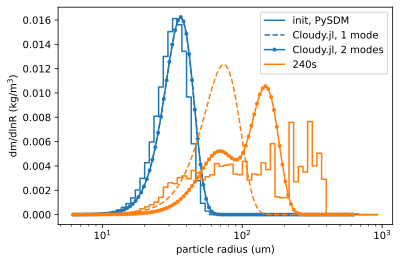

HTML(value="<a href='./box2.pdf' target='_blank'>./box2.pdf</a><br>")

In [7]:
from PySDM.dynamics.collisions.collision_kernels import SimpleGeometric
settings = Settings0D()
settings.kernel = SimpleGeometric(C=1e6 * np.pi)
settings.n_sd = 2**12
settings.dt = 1 * si.s
settings._steps = [0, 240]  # pylint: disable=protected-access
settings.radius_bins_edges = np.logspace(
    np.log10(8.0 * si.um), np.log10(1000 * si.um), num=64, endpoint=True
)

cmap = matplotlib.cm.get_cmap('viridis')

res = run_box(settings, settings._steps)

fig, ax = pyplot.subplots(ncols=1,sharey=True,figsize=(6,4),dpi=200)

m_plt = np.logspace(-3.0, 3.0, 100) #µg
r_plt = (m_plt * 1e6 * 3 / 4 / np.pi) ** (1/3) #µm

for (j, step) in enumerate(settings._steps):  # pylint: disable=protected-access
    if j == 0:
        lbl = 'init, PySDM'
    else:
        lbl = str(step) + 's'
    line = ax.step(res.x, res.y[j]*settings.rho, label=lbl)
    
    if j == 0:
        lbl =  'Cloudy.jl, 1 mode'
    else:
        lbl = '_'
    a_dmdlnr = dvdlnr_gamma(m_plt, aDists[j][0], aDists[j][1], aDists[j][2]) * 3 * m_plt**2 #µg / cm^3
    a_dmdlnr *= 1e-3 # kg / m^3
    ax.plot(r_plt, a_dmdlnr, '--', label=lbl, color=line[-1].get_color())

    if j == 0:
        lbl =  'Cloudy.jl, 2 modes'
    else:
        lbl = '_'
    b_dmdlnr = dvdlnr_gamma(m_plt, bDists1[j][0], bDists1[j][1], bDists1[j][2]) * 3 * m_plt**2 #µg / cm^3
    b_dmdlnr += dvdlnr_gamma(m_plt, bDists2[j][0], bDists2[j][1], bDists2[j][2]) * 3 * m_plt**2 #µg / cm^3
    b_dmdlnr *= 1e-3 # kg / m^3
    ax.plot(r_plt, b_dmdlnr, '.-', label=lbl, color=line[-1].get_color())

ax.set_xscale("log")
ax.set_xlabel("particle radius (um)")
ax.set_ylabel("dm/dlnR (kg/m$^3$)")
ax.legend()
show_plot('box2.pdf')

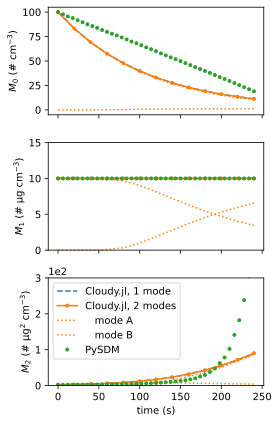

HTML(value="<a href='./box2_moments.pdf' target='_blank'>./box2_moments.pdf</a><br>")

In [8]:
settings._steps = np.linspace(0, 240, 41, dtype=int)
res = run_box(settings, settings._steps)

fig, ax = pyplot.subplots(nrows=3,sharex=True,figsize=(4,6),dpi=200)
for i in range(3):
    line = ax[i].plot(t, aMoments[i], '--', label='Cloudy.jl, 1 mode')
    line = ax[i].plot(t, bMoments[i,0] + bMoments[i,1], '.-', label='Cloudy.jl, 2 modes')
    ax[i].plot(t, bMoments[i,0], ':', linewidth=1.5, label='   mode A', color=line[-1].get_color())
    ax[i].plot(t, bMoments[i,1], ':', linewidth=1.5, label='   mode B', color=line[-1].get_color())
    ax[i].plot(settings._steps, res.moments[:,i] * settings.dv * si.cm**3 * (si.m**3 / si.cm**3 * 1e6)**i,marker='.',linestyle='None',label='PySDM')

ax[2].legend()
ax[0].set_ylabel('$M_0$ (# cm$^{-3}$)')
ax[1].set_ylabel('$M_1$ (# µg cm$^{-3}$)')
ax[1].set_ylim([0.0, 15.0])
ax[2].set_ylim([0.0, 3e2])
ax[2].set_ylabel('$M_2$ (# µg$^2$ cm$^{-3}$)')
ax[2].set_xlabel('time (s)')
ax[2].ticklabel_format(axis='y', style='sci', scilimits=(0,2))

pyplot.tight_layout()
show_plot('box2_moments.pdf')